<h1 align=center><font size = 10> ASM 2 </font></h1>

# Bài toán

Trong notebook này, chúng ta sẽ thực hành tất cả các thuật toán phân loại mà chúng ta đã học trong khóa này.

Hãy tải tập dữ liệu bằng thư viện Pandas và áp dụng các thuật toán sau rồi tìm ra thuật toán tốt nhất cho tập dữ liệu cụ thể này bằng các phương pháp đánh giá độ chính xác.

Kiểu của tập dữ liệu và bài toán là một phân loại nhị phân có giám sát cổ điển. Với một số yếu tố có các đặc điểm (đặc trưng) nhất định, chúng ta cần xây dựng mô hình ML để xác định những người bị ảnh hưởng bởi bệnh tiểu đường loại 2.

Để giải quyết vấn đề, chúng ta sẽ phải phân tích dữ liệu, thực hiện bất kỳ chuyển đổi và chuẩn hóa cần thiết nào, áp dụng thuật toán học máy, huấn luyện mô hình, kiểm tra chất lượng của mô hình đã huấn luyện và lặp lại với các thuật toán khác cho đến khi tìm ra chất lượng cao nhất cho kiểu của tập dữ liệu.

# Pipeline 

1. Đọc dữ liệu.

3. Trực quan dữ liệu.

4. Tiền xử lý dữ liệu.

5. Xây dựng mô hình phân loại và đánh giá chất lượng.

  - KNN

  - Decision Tree

  - SVM

  - Logistic Regression

  - Neural Network

6. Xây dựng mô hình phân loại bằng Ensemble và đánh giá chất lượng.

  - Soft voting

  - Hard voting

7. Đưa ra kết quả tổng hợp chất lượng mô hình phân loại của tất cả thuật toán.

# Tập dữ liệu

Pima là một tộc người Mỹ bản địa sống ở Arizona. Yếu tố di truyền cho phép nhóm người này có thể tồn tại được với chế độ ăn nghèo carbohydrate trong nhiều năm. Những năm gần đây, do sự chuyển đổi đột ngột từ cây nông nghiệp truyền thống sang thực phẩm chế biến cùng với sự suy giảm hoạt động thể chất đã khiến tỷ lệ mắc bệnh tiểu đường loại 2 cao nhất, cho nên nó trở thành đối tượng của nhiều nghiên cứu.

Tập dữ liệu gồm dữ liệu từ 768 phụ nữ với 8 đặc điểm, cụ thể:

- Số lần mang thai
- Nồng độ đường huyết sau 2 giờ trong xét nghiệm dung nạp glucose đường uống
- Huyết áp tâm trương (mm Hg)
- Độ dày của nếp gấp da (mm)
- Insulin huyết thanh trong 2 giờ (mu U/ml)
- Chỉ số BMI (trọng lượng tính bằng kg/(chiều cao tính bằng m)^2)
- Chức năng phả hệ bệnh tiểu đường
- Tuổi (năm)
- Cột cuối cùng của tập dữ liệu cho biết một người có bị chẩn đoán mắc bệnh tiểu đường (1) hay không (0)

# Thư viện cần thiết

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline

# Load dữ liệu từ file CSV  

### Task 1: Đọc dữ liệu 

Do file không chứa tên cột/đặc trưng, do đó hãy thêm tên cột bằng cách sử dụng mô tả từ trang web tập dữ liệu gốc:

Tên cột lần lượt là: "NumTimesPrg", "PlGlcConc", "BloodP", "SkinThick", "TwoHourSerIns", "BMI", "DiPedFunc", "Age", "HasDiabetes"

In [2]:
pima_df = pd.read_csv("pima-indians-diabetes.csv",header= None)
pima_df.columns = ["NumTimesPrg", "PlGlcConc", "BloodP", "SkinThick", "TwoHourSerIns", "BMI", "DiPedFunc", "Age", "HasDiabetes"]
pima_df


,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Trực quan hóa và tiền xử lý dữ liệu



## Ma trận tương quan dữ liệu

Ma trận tương quan là một công cụ quan trọng để hiểu mối tương quan giữa các đặc điểm khác nhau. Các giá trị sẽ nằm trong khoảng từ -1 đến 1; giá trị càng gần 1 thì càng có giữa hai đặc điểm càng có mối tương quan tốt.

### Task 2: Tính ma trận tương quan cho tập dữ liệu.

In [3]:
pima_df.corr()

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
NumTimesPrg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
PlGlcConc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodP,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThick,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
TwoHourSerIns,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiPedFunc,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
HasDiabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### Task 3: Trực quan ma trận tương quan bằng heatmap trong seaborn.

<Axes: >

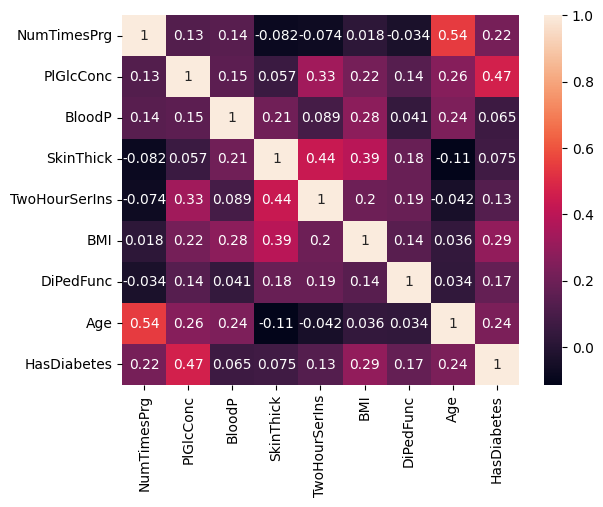

In [4]:
sns.heatmap(pima_df.corr(), annot = True)


## Trực quan hóa tập dữ liệu

Trực quan hóa dữ liệu là một bước quan trọng của phân tích dữ liệu. Nhờ có trực quan hóa dữ liệu, chúng ta sẽ hiểu rõ hơn về các phân phối giá trị đặc trưng khác nhau: ví dụ: chúng ta nắm được độ tuổi trung bình của mọi người hoặc chỉ số BMI trung bình,...

Tất nhiên, chúng ta có thể giới hạn việc xem xét hiển thị bảng, nhưng điều này cũng đồng nghĩa với việc chúng ta có thể sẽ bỏ lỡ những yếu tố quan trọng có thể ảnh hưởng đến độ chính xác của mô hình.

### Task 4: Trực quan histogram với tất cả cột tập dữ liệu.

<Figure size 1200x1000 with 0 Axes>

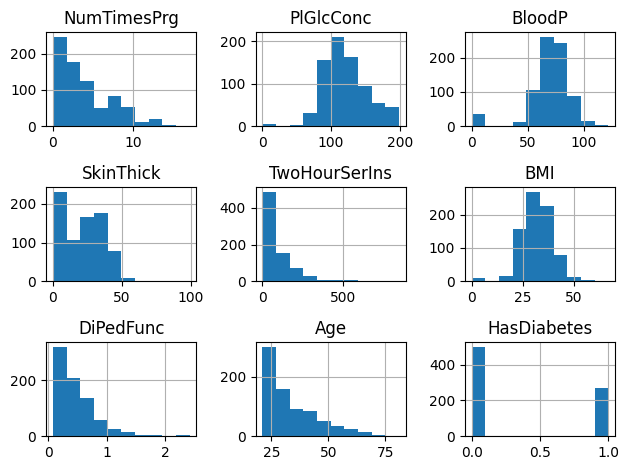

In [5]:
plt.figure(figsize= (12,10))
pima_df.hist()
plt.tight_layout()


Tôi nhận thấy trong tập dữ liệu (điều này không rõ ràng ngay từ đầu) là thực tế một số người có giá trị null (không) cho một số đặc trưng: BMI hoặc huyết áp không hoàn toàn là 0.

Làm thế nào để xử lý các giá trị tương tự? Hãy xem phần sau trong giai đoạn biến đổi dữ liệu.

## Làm sạch và biến đổi dữ liệu

Từ phân tích trước, chúng ta đã nhận thấy một số bệnh nhân bị thiếu dữ liệu ở một số đặc trưng. Các thuật toán ML hoạt động không hiệu quả khi dữ liệu bị khuyết, vì vậy chúng ta phải tìm cách để "làm sạch" dữ liệu hiện có.
 
Cách dễ nhất là loại bỏ tất cả những bệnh nhân có giá trị null/0, nhưng nếu làm theo cách này, chúng ta cũng sẽ loại bỏ rất nhiều dữ liệu quan trọng.

Cách khác là thay thế giá trị null/0 bằng giá trị trung bình của cột dữ liệu đó. Hãy xem làm thế nào để áp dụng phương pháp thứ hai này.

### Task 5: Gán giá trị bị khuyết trên ['BMI', 'BloodP', 'PlGlcConc', 'SkinThick', 'TwoHourSerIns'] bằng giá trị trung vị hoặc bất kỳ cách nào khác có hiệu quả.

Chúng tôi chưa chuyển đổi tất cả các cột vì một số giá trị có thể là 0 (như "Số lần mang thai").

In [6]:
pima_df.isna().sum()


NumTimesPrg      0
PlGlcConc        0
BloodP           0
SkinThick        0
TwoHourSerIns    0
BMI              0
DiPedFunc        0
Age              0
HasDiabetes      0
dtype: int64

## Chuẩn hóa dữ liệu

Một trong những cách biến đổi dữ liệu quan trọng nhất mà chúng ta cần áp dụng là co giãn đặc trưng (feature scaling). Về cơ bản, hầu hết các thuật toán ML không hoạt động tốt nếu các đặc trưng có một bộ giá trị khác nhau. Ví dụ trong trường hợp của chúng ta, độ tuổi dao động từ 20 đến 80 tuổi, trong khi số lần bệnh nhân mang thai lại từ 0 đến 17 tuổi. Do đó, chúng ta cần áp dụng một phép biến đổi thích hợp.

### Task 6: Thực hiện co giãn dữ liệu thành giá trị trung bình bằng 0 và phương sai bằng 1.

Lưu ý: Chỉ áp dụng với các đặc trưng, không áp dụng với mục tiêu.

In [7]:
from sklearn.preprocessing import StandardScaler

# thiếu Standard Scaler()
X = pima_df.drop(columns= ['HasDiabetes'])
X = StandardScaler().fit_transform(X)
Y = pima_df['HasDiabetes']
X[0:5]



array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546,  0.60439732, -0.10558415],
       [-0.84488505, -0.99820778, -0.16054575,  0.15453319,  0.12330164,
        -0.49404308, -0.92076261, -1.04154944],
       [-1.14185152,  0.5040552 , -1.50468724,  0.90726993,  0.76583594,
         1.4097456 ,  5.4849091 , -0.0204964 ]])

In [8]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: HasDiabetes, dtype: int64

## Phân tách dữ liệu

Bây giờ dữ liệu đã được chuyển đổi, chúng ta cần chia tập dữ liệu thành hai phần: tập dữ liệu huấn luyện và tập dữ liệu kiểm tra. Phân tách tập dữ liệu là một bước rất quan trọng đối với các mô hình học máy có giám sát. Về cơ bản, chúng ta sẽ sử dụng phần đầu tiên để huấn luyện mô hình (bỏ qua cột có nhãn được gán trước), sau đó sử dụng mô hình đã huấn luyện để đưa ra dự đoán về dữ liệu mới (là tập dữ liệu kiểm tra, không phải là một phần của tập huấn luyện) và so sánh giá trị dự đoán với nhãn đã được chỉ định.

### Task 7: Tách tập dữ liệu train/test data

- test site = 20%
- random_state=7.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=7)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(614, 8) (614,)
(154, 8) (154,)


**Câu hỏi: Tại sao chúng ta nên thực hiện chuẩn hóa và phân tách dữ liệu trước bước huấn luyện?**

#### Đáp án: Đảm bảo dữ liệu đã lọc bớt nhiễu và có thể đưa ra kết quả tốt hơn khi train model

### Task 8: In ra tỷ lệ dương tính trên tổng số phụ nữ mắc bệnh tiểu đường trong tập dữ liệu đầy đủ, tập huấn luyện và tập kiểm tra.

In [10]:
diabetes = (pima_df['HasDiabetes'] == 1).sum()
diabetes_train = (Y_train == 1).sum()
diabetes_test = (Y_test == 1).sum()
diabetes_sum = len(pima_df['HasDiabetes'])

In [11]:
print(diabetes)
print(diabetes_train)
print(diabetes_test)
print(diabetes_sum)

268
211
57
768


In [12]:
print("Diabetes rates in pima_df: ", np.round(diabetes/diabetes_sum * 100,3))
print("Diabetes rates in test set: ", np.round(diabetes_test/diabetes_sum * 100,3))
print("Diabetes rates in train set: ", np.round(diabetes_train/diabetes_sum * 100,3))

Diabetes rates in pima_df:  34.896
Diabetes rates in test set:  7.422
Diabetes rates in train set:  27.474


# Phân loại 

Giờ đến lượt bạn rồi, hãy sử dụng tập huấn luyện để xây dựng một mô hình chính xác, sau đó sử dụng tập kiểm tra để báo lại độ chính xác của mô hình.

Bạn nên sử dụng các thuật toán sau:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression
- Neural Network
- Soft voting
- Hard voting



**__ Lưu ý:__**

- Bạn phải cố gắng **TINH CHỈNH ÍT NHẤT 3 SIÊU THAM SỐ** trên mỗi thuật toán, ngoại trừ soft voting và hard voting.
- Bạn có thể lên phía trên notebook và thay đổi quá trình tiền xử lý, lựa chọn đặc trưng, trích xuất đặc trưng,... để tạo ra mô hình tốt hơn.
- Bạn nên sử dụng thư viện scikit-learn, Scipy hoặc Numpy để phát triển các thuật toán phân loại.
- Bạn nên bao gồm code của thuật toán trong các cell sau.

## Import các phép đo đánh giá

In [13]:
from sklearn.metrics import jaccard_score, f1_score

In [14]:
# Dictionary để giữ tất cả score của bộ phân loại
f1_scores = {'train':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'NN': 0, 'EN_HARD': 0, 'EN_SOFT': 0},
             'test':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'NN': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}
jaccard_scores = {'train':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'NN': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 
                  'test':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'NN': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}


## Task 9: K Nearest Neighbor(KNN)

Tinh chỉnh siêu tham số để có được mô hình KNN với độ chính xác tốt nhất. 

In ra các giá trị siêu tham số của mô hình KNN với độ chính xác tốt nhất. 

Đưa ra dự đoán từ dữ liệu huấn luyện và kiếm tra trên mô hình KNN. 

Tính f1 score và Jaccard score rồi lưu vào f1_scores dict và jaccard_scores dict.

Yêu cầu:

- Số lượng siêu tham số tối thiểu: 3

- Số lượng giá trị siêu tham số tối đa trong một lần tìm kiếm: 20

- Sử dụng GridSearchCV trong sklearn.model_selection.

- Không nên sử dụng dữ liệu kiểm tra để tìm ra các tham số tốt nhất.

- F1 score trên dữ liệu kiểm tra phải cao hơn **0.6**, Jaccard score phải cao hơn **0.4**.

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [16]:
def gird_cv(estimator, estimator_name, params, X_train, X_test, y_train, y_test, f1_scores,jaccard_scores, print_results = True):
    clf = GridSearchCV(estimator,params)
    clf.fit(X_train,y_train)
    print("best parameters(s): ")
    print(clf.best_params_)
    print("========")
    for i,x,y in zip(['train','test'],[X_train,X_test],[y_train,y_test]):
        f1_scores[i][estimator_name] = f1_score(y,clf.predict(x))
        jaccard_scores[i][estimator_name] = jaccard_score(y,clf.predict(x))
    
    if(print_results):
        print("F1 score in train set : ", f1_scores['train'][estimator_name])
        print("F1 score in test set : ", f1_scores['test'][estimator_name])
        print("======")
        print('Jaccard score in train set : ',jaccard_scores['train'][estimator_name])
        print('Jaccard score in test set : ',jaccard_scores['test'][estimator_name])
    return f1_scores,jaccard_scores

In [17]:
knn = KNeighborsClassifier()
knn_params = {
    'n_neighbors' : np.arange(3,20),
    'weights': ['uniform','distance'],
    'p': [1,2],
}
f1_scores,jaccard_scores =gird_cv(knn,'KNN',knn_params,X_train,X_test,Y_train,Y_test,f1_scores,jaccard_scores)

best parameters(s): 
{'n_neighbors': 19, 'p': 1, 'weights': 'uniform'}
F1 score in train set :  0.6123595505617977
F1 score in test set :  0.6938775510204082
Jaccard score in train set :  0.44129554655870445
Jaccard score in test set :  0.53125


**Câu hỏi: Diễn giải các tham số bạn đã chọn để tinh chỉnh trong thuật toán KNN.**

### Trả lời: 
### 'n_neighbors': 19 -> lấy 19 neighbors gần nhất,
### p = 1 -> sử dụng cách đo khoảng cách Manhattan, 2: độ đo euclid
### 'weights': 'uniform' -> tất cả cả điểm dữ liệu được đánh trọng số nhu nhau

## Task 10: Decision Tree

Tinh chỉnh siêu tham số để có được mô hình DT với độ chính xác tốt nhất. 

In ra các giá trị siêu tham số của mô hình DT với độ chính xác tốt nhất.

Đưa ra dự đoán từ dữ liệu huấn luyện và kiếm tra trên mô hình DT. 

Tính f1 score và Jaccard score rồi lưu vào f1_scores dict và jaccard_scores dict.

Yêu cầu:

- Số lượng siêu tham số tối thiểu: 3

- Số lượng giá trị siêu tham số tối đa trong một lần tìm kiếm: 20

- Sử dụng GridSearchCV trong sklearn.model_selection.

- Không nên sử dụng dữ liệu kiểm tra để tìm ra các tham số tốt nhất.

- F1 score trên dữ liệu kiểm tra phải cao hơn **0.6**, Jaccard score phải cao hơn **0.4**.

In [18]:
from sklearn import tree

In [20]:
dt = tree.DecisionTreeClassifier()
dt_params = {
    'criterion': ['entropy','log_loss'],
    #'splitter' : ['best'],
    'max_depth' : [3,4,5,6]
}

f1_scores,jaccard_scores = gird_cv(dt,'DT',dt_params,X_train,X_test,Y_train,Y_test,f1_scores,jaccard_scores)

best parameters(s): 
{'criterion': 'entropy', 'max_depth': 3}
F1 score in train set :  0.6276595744680852
F1 score in test set :  0.6464646464646465
Jaccard score in train set :  0.4573643410852713
Jaccard score in test set :  0.47761194029850745


**Câu hỏi: Diễn giải các tham số bạn đã chọn để tinh chỉnh trong thuật toán DT.**

Đáp án:

#### 'criterion': cây DT được xây dựng theo tiêu chí 'entropy' hay 'log-loss'
#### 'splitter': chọn cách phân chia ở mỗi node
#### 'max_depth': tùy chọn độ sâu cho cây DT

## Task 11: Support Vector Machine

Tinh chỉnh siêu tham số để có được mô hình SVM với độ chính xác tốt nhất. 

In ra các giá trị siêu tham số của mô hình SVM với độ chính xác tốt nhất.

Đưa ra dự đoán từ dữ liệu huấn luyện và kiếm tra trên mô hình SVM. 

Tính f1 score và Jaccard score rồi lưu vào f1_scores dict và jaccard_scores dict.

Yêu cầu:

- Số lượng siêu tham số tối thiểu: 3

- Số lượng giá trị siêu tham số tối đa trong một lần tìm kiếm: 20

- Sử dụng GridSearchCV trong sklearn.model_selection.

- Không nên sử dụng dữ liệu kiểm tra để tìm ra các tham số tốt nhất.

- F1 score trên dữ liệu kiểm tra phải cao hơn **0.6**, Jaccard score phải cao hơn **0.4**.

In [21]:
from sklearn.svm import SVC

In [22]:
svm = SVC()
svm_params = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C' : [0.01,0.1,0.2,0.4],
}
f1_scores,jaccard_scores = gird_cv(svm,'SVM',svm_params,X_train,X_test,Y_train,Y_test,f1_scores,jaccard_scores)



best parameters(s): 
{'C': 0.1, 'kernel': 'linear'}
F1 score in train set :  0.6353591160220995
F1 score in test set :  0.6595744680851063
Jaccard score in train set :  0.46558704453441296
Jaccard score in test set :  0.49206349206349204


**Câu hỏi: Diễn giải các tham số bạn đã chọn để tinh chỉnh trong thuật toán SVM.**

#### Đáp án:
#### kernel : 4 loại hàm kernel 
#### C: tham số điều chuẩn, sử dụng điều chuẩn L2

## Task 12: Logistic Regression

Tinh chỉnh siêu tham số để có được mô hình LR với độ chính xác tốt nhất. 

In ra các giá trị siêu tham số của mô hình LR với độ chính xác tốt nhất.

Đưa ra dự đoán từ dữ liệu huấn luyện và kiếm tra trên mô hình LR. 

Tính f1 score và Jaccard score rồi lưu vào f1_scores dict và jaccard_scores dict.

Yêu cầu:

- Số lượng siêu tham số tối thiểu: 3

- Số lượng giá trị siêu tham số tối đa trong một lần tìm kiếm: 20

- Sử dụng GridSearchCV trong sklearn.model_selection.

- Không nên sử dụng dữ liệu kiểm tra để tìm ra các tham số tốt nhất.

- F1 score trên dữ liệu kiểm tra phải cao hơn **0.6**, Jaccard score phải cao hơn **0.4**.

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
LR =  LogisticRegression()
LR_params = {
    'penalty': ['elasticnet'],
    'solver': ['saga'],
    'C': np.linspace(0.1,0.4,10),
    'l1_ratio':[0.6666]
}
f1_scores,jaccard_scores = gird_cv(LR,'LR',LR_params,X_train,X_test,Y_train,Y_test,f1_scores,jaccard_scores)




best parameters(s): 
{'C': 0.4, 'l1_ratio': 0.6666, 'penalty': 'elasticnet', 'solver': 'saga'}
F1 score in train set :  0.6236559139784947
F1 score in test set :  0.6597938144329897
Jaccard score in train set :  0.453125
Jaccard score in test set :  0.49230769230769234


**Câu hỏi: Diễn giải các tham số bạn đã chọn để tinh chỉnh trong thuật toán LR.**

#### Đáp án:
#### penalty: dạng điều chuẩn ElasticNet (L1+L2)
#### C : tham số điều chuẩn
#### solver: thuật toán dùng để tối ưu
#### l1_ratio: tỉ lệ tham số l1 khi sử dụng điều chuẩn ElasticNet còn lại là L2

## Task 13: Neural Network

Tinh chỉnh siêu tham số để có được mô hình NN với độ chính xác tốt nhất. 

In ra các giá trị siêu tham số của mô hình NN với độ chính xác tốt nhất.

Đưa ra dự đoán từ dữ liệu huấn luyện và kiếm tra trên mô hình NN. 

Tính f1 score và Jaccard score rồi lưu vào f1_scores dict và jaccard_scores dict.

Yêu cầu:

- Số lượng siêu tham số tối thiểu: 3

- Số lượng giá trị siêu tham số tối đa trong một lần tìm kiếm: 20

- Sử dụng GridSearchCV trong sklearn.model_selection.

- Không nên sử dụng dữ liệu kiểm tra để tìm ra các tham số tốt nhất.

- F1 score trên dữ liệu kiểm tra phải cao hơn **0.6**, Jaccard score phải cao hơn **0.4**.

In [33]:
from sklearn.neural_network import MLPClassifier

In [39]:
NN = MLPClassifier(max_iter=(1500))
NN_params = {
    'hidden_layer_sizes': [(50,30),(30,40,35)],
    'activation' : ['logistic', 'tanh', 'relu'],
    'solver': ['sgd','adam'],
    'shuffle' : [False]
    
}
f1_scores, jaccard_scores = gird_cv(NN,'NN',NN_params,X_train,X_test,Y_train,Y_test,f1_scores,jaccard_scores)

best parameters(s): 
{'activation': 'relu', 'hidden_layer_sizes': (50, 30), 'shuffle': False, 'solver': 'sgd'}
F1 score in train set :  0.6543535620052771
F1 score in test set :  0.7070707070707071
Jaccard score in train set :  0.48627450980392156
Jaccard score in test set :  0.546875


**Câu hỏi: Diễn giải các tham số bạn đã chọn để tinh chỉnh trong thuật toán NN.**

#### hidden_layer_sizes: shape của hidden layer với số neuron từng layer
#### activation: hàm kích hoạt (tanh, relu, regression)
#### solver: tối ưu các siêu tham số alpha, beta1, beta2

## Task 14: Soft Voting Ensemble 

Điều chỉnh trọng số trong Soft Voting Ensemble để đưa ra kết quả dự đoán tốt nhất.

Đưa ra dự đoán từ dữ liệu huấn luyện và kiếm tra trên mô hình soft voting ensembling model. 

Tính f1 score và Jaccard score rồi lưu vào f1_scores dict và jaccard_scores dict.

Yêu cầu:

- Sử dụng 5 mô hình trên

- Sử dụng cùng một thiết lập cho 5 mô hình như các bước trên.

- F1 score trên dữ liệu kiểm tra phải lớn hơn **0.66**, Jaccard similarity score phải lớn hơn **0.5**.

In [40]:
from sklearn.ensemble import VotingClassifier

In [41]:
estimators = []
estimators.append(('LR',LogisticRegression(solver='lbfgs',penalty='l2',fit_intercept=False)))
estimators.append(('SVC',SVC(kernel='rbf',degree=3,probability=True)))
estimators.append(('DT',tree.DecisionTreeClassifier()))
estimators.append(('KNN',KNeighborsClassifier()))




In [42]:
EN_SOFT = VotingClassifier(estimators=estimators,voting='soft')
EN_SOFT.fit(X_train,Y_train)
EN_HARD_params = {
    # 'estimators': estimators,
    'voting': ['soft'],
    
}

f1_scores['train']['EN_SOFT'] = f1_score(Y_train,EN_SOFT.predict(X_train))
f1_scores['test']['EN_SOFT'] = f1_score(Y_test,EN_SOFT.predict(X_test))
jaccard_scores['train']['EN_SOFT'] = jaccard_score(Y_train,EN_SOFT.predict(X_train))
jaccard_scores['test']['EN_SOFT'] = jaccard_score(Y_test,EN_SOFT.predict(X_test))

print("F1 score test: ", f1_score(Y_test,EN_SOFT.predict(X_test)))
print("Jaccard score test: ", jaccard_score(Y_test,EN_SOFT.predict(X_test)))
print("F1 score train: ", f1_score(Y_train,EN_SOFT.predict(X_train)))
print("Jaccard score train: ", jaccard_score(Y_train,EN_SOFT.predict(X_train)))

F1 score test:  0.6851851851851852
Jaccard score test:  0.5211267605633803
F1 score train:  0.9174757281553398
Jaccard score train:  0.8475336322869955


## Task 15: Hard Voting Ensemble 

Điều chỉnh trọng số trong Hard Voting Ensemble để đưa ra kết quả dự đoán tốt nhất.

Đưa ra dự đoán từ dữ liệu huấn luyện và kiếm tra trên mô hình hard voting ensembling model. 

Tính f1 score và Jaccard score rồi lưu vào f1_scores dict và jaccard_scores dict.

Yêu cầu:

- Sử dụng 5 mô hình trên

- Sử dụng cùng một thiết lập cho 5 mô hình như các bước trên.

- F1 score trên dữ liệu kiểm tra phải lớn hơn **0.57**, Jaccard similarity score phải lớn hơn **0.45**.

In [43]:
EN_HARD = VotingClassifier(estimators=estimators,voting='hard')
EN_HARD.fit(X_train,Y_train)
EN_HARD_params = {
    # 'estimators': estimators,
    'voting': ['hard'],
    
}

f1_scores['train']['EN_HARD'] = f1_score(Y_train,EN_SOFT.predict(X_train))
f1_scores['test']['EN_HARD'] = f1_score(Y_test,EN_SOFT.predict(X_test))
jaccard_scores['train']['EN_HARD'] = jaccard_score(Y_train,EN_SOFT.predict(X_train))
jaccard_scores['test']['EN_HARD'] = jaccard_score(Y_test,EN_SOFT.predict(X_test))

print("F1 score test: ", f1_score(Y_test,EN_SOFT.predict(X_test)))
print("Jaccard score test: ", jaccard_score(Y_test,EN_SOFT.predict(X_test)))
print("F1 score train: ", f1_score(Y_train,EN_SOFT.predict(X_train)))
print("Jaccard score train: ", jaccard_score(Y_train,EN_SOFT.predict(X_train)))



F1 score test:  0.6851851851851852
Jaccard score test:  0.5211267605633803
F1 score train:  0.9174757281553398
Jaccard score train:  0.8475336322869955


In [44]:
df_f1 = pd.DataFrame(f1_scores)
df_f1

,train,test
KNN,0.612360,0.693878
DT,0.627660,0.646465
SVM,0.635359,0.659574
LR,0.623656,0.659794
NN,0.654354,0.707071
EN_HARD,0.917476,0.685185
EN_SOFT,0.917476,0.685185


# Báo cáo
Bạn có thể tường thuật độ chính xác của mô hình đã xây bằng cách sử dụng các phép đo đánh giá khác nhau:

| Algorithm | Jaccard-training | F1-score-training |Jaccard-testing | F1-score-testing |
|-----------|------------------|-------------------|----------------|------------------|
| KNN | ? | ? |  ? |  ? |
| Decision Tree | ? | ? |  ? |  ? |
| SVM | ? | ? |  ? |  ? |
| Logistic Regression| ? | ? |  ? |  ? |   
| Neural Network| ? | ? |  ? |  ? |
| Hard Voting | ? | ? |  ? |  ? |
| Soft Voting | ? | ? |  ? |  ? |


## Task 16: Tạo data frame mô tả kết quả chính xác như trên.

In [45]:
df_f1 = pd.DataFrame(f1_scores)
df_jaccard = pd.DataFrame(jaccard_scores)
df_resulst = pd.concat([df_jaccard['train'],df_f1['train'],df_jaccard['test'],df_f1['test']],axis =1)
columns = ['Jaccard-training','F1-score-training','Jaccard-testing','F1-score-testing']
df_resulst.columns = columns
df_resulst

,Jaccard-training,F1-score-training,Jaccard-testing,F1-score-testing
KNN,0.441296,0.612360,0.531250,0.693878
DT,0.457364,0.627660,0.477612,0.646465
SVM,0.465587,0.635359,0.492063,0.659574
LR,0.453125,0.623656,0.492308,0.659794
NN,0.486275,0.654354,0.546875,0.707071
EN_HARD,0.847534,0.917476,0.521127,0.685185
EN_SOFT,0.847534,0.917476,0.521127,0.685185


**Câu hỏi: Có phải các phương pháp ensemble luôn tốt hơn một mô hình đơn lẻ không? Nếu không, hãy giải thích tại sao?**

Trả lời:Không phải lúc nào ensemble luôn tốt hơn một mô hình đơn lẻ vi việc học quá kĩ dữ liệu với nhiều mô hình khác nhau của phương pháp ensemble có thể dẫn đến overfit, dữ liệu train quá ít cũng dẫn đến overfiting
